In [50]:
# importing libraries   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# loading data
orders = pd.read_excel('orders.xlsx')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99444 entries, 0 to 99443
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99444 non-null  object        
 1   customer_id                    99444 non-null  object        
 2   order_status                   99444 non-null  object        
 3   order_purchase_timestamp       99444 non-null  datetime64[ns]
 4   order_approved_at              99284 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97661 non-null  datetime64[ns]
 6   order_delivered_customer_date  96479 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99444 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [11]:
payments = pd.read_excel('order_payment.xlsx')
payments.inf
customers = pd.read_excel('customers.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103887 non-null  object 
 1   payment_sequential    103887 non-null  int64  
 2   payment_type          103887 non-null  object 
 3   payment_installments  103887 non-null  int64  
 4   payment_value         103885 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [12]:
customers = pd.read_excel('customers.xlsx')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [17]:
# handling missing values
orders.isnull().sum()
payments.isnull().sum()
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [20]:
# filling null values with na
orders2 = orders.fillna('N/A')
# checking 
orders2.isnull().sum()


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [22]:
# dropping null values in payment
payments2 = payments.dropna( )
# checking
payments2.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [26]:
# removing duplicates from orders2
orders2.duplicated().sum()
orders3 = orders2.drop_duplicates()
orders3.duplicated().sum()


0

In [27]:
# removing duplicates from payments2
payments2.duplicated().sum()
payments3 = payments2.drop_duplicates()
payments3.duplicated().sum()

0

In [31]:
# filtering
# selecting a subset of orders based on their status
invoiced_orders = orders3[orders3['order_status'] == 'invoiced']
#invoiced_orders.head()

#reset index
invoiced_orders.reset_index(drop=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,N/A,N/A,2017-05-09
1,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,N/A,N/A,2018-08-21
2,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,N/A,N/A,2017-08-28
3,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,N/A,N/A,2017-06-06
4,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,N/A,N/A,2017-12-20
...,...,...,...,...,...,...,...,...
309,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,N/A,N/A,2017-12-18
310,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,N/A,N/A,2018-06-05
311,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,N/A,N/A,2017-12-15
312,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,N/A,N/A,2018-08-17


In [44]:
# select a subset of payments where :
# type = credit and value > 100

payments_subset = payments3[
     (payments3['payment_type'] == 'credit_card') & 
     (payments3['payment_value'] > 1000) 
     ]

payments_subset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
161,886b114d034f4ac1d39d964c1b2a8182,1,credit_card,10,2027.16
168,62d9b911d7c56cf455f660eecb8ddd3a,1,credit_card,10,1002.73
248,4ff8e28200e5a7a50b448cfaaf1f8ed3,1,credit_card,10,2288.31
360,ce6d150fb29ada17d2082f4847107665,1,credit_card,10,1586.47
435,e11fec6c25945565c1ef4f14fc3c03b7,1,credit_card,10,1995.69
...,...,...,...,...,...
103606,21a3f15754b759c91fff4535aaeb3486,1,credit_card,10,1224.03
103623,b0b0d3285e59abf2f6c9d7e1bf761323,1,credit_card,10,3044.12
103719,fc20b8e282da6f3fbcdd3a3cedecb723,1,credit_card,10,3782.19
103734,fb2dccfadca8cd6ebddc5d10ae48d1f7,1,credit_card,3,1134.44


In [47]:
# select a subset of customers based on their state
customers_subset = customers2[ customers2['customer_state'] =='SP' ]
customers_subset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99432,f255d679c7c86c24ef4861320d5b7675,d111b06b6f3a2add0d2241325f65b5ca,13500,rio claro,SP
99434,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP


In [49]:
#merge and join data frames 
#merge orders data and payments data on order_id column
merged_data = pd.merge(orders,payments, on='order_id')
#join the merged data with customers data based on customer_id column
joined_data = pd.merge(merged_data,customers,on='customer_id')

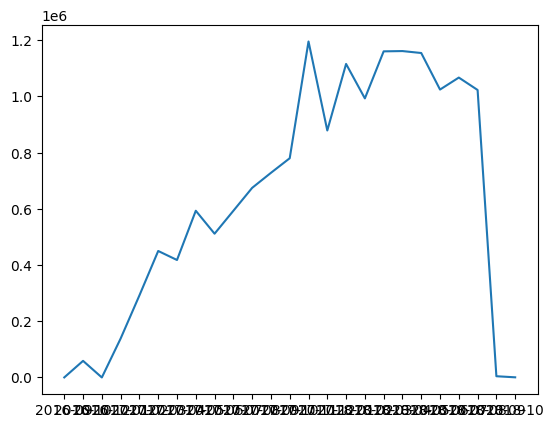

In [53]:
# data visualization
joined_data['month_year'] = joined_data['order_purchase_timestamp'].dt.to_period('M')
joined_data['week_year'] = joined_data['order_purchase_timestamp'].dt.to_period('W')
joined_data['year'] = joined_data['order_purchase_timestamp'].dt.to_period('Y')

grouped_data = joined_data.groupby('month_year')['payment_value'].sum()
grouped_data = grouped_data.reset_index()

grouped_data["month_year"] = grouped_data['month_year'].astype(str)

plt.plot(grouped_data['month_year'] , grouped_data['payment_value'])